In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import models, layers

In [2]:
# Read the data to dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jerichols/MLTerapan/main/BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3607,2024-08-02,65353.500000,65523.222656,61184.894531,61415.066406,61415.066406,4.306088e+10
3608,2024-08-03,61414.808594,62148.371094,59836.527344,60680.093750,60680.093750,3.175303e+10
3609,2024-08-04,60676.093750,61062.988281,57210.804688,58116.976563,58116.976563,3.175892e+10
3610,2024-08-05,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# droping null value because there is NaN
df= df.dropna()

In [4]:
# Only use close and date
df = df[[ 'Date', 'Close']] # I only use close and date feature
df

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3606,2024-08-01,65357.500000
3607,2024-08-02,61415.066406
3608,2024-08-03,60680.093750
3609,2024-08-04,58116.976563


In [5]:
# Set date as index
df.loc[:, 'Date'] = pd.to_datetime(df['Date']) # Change it to datetime
df = df.set_index(['Date'])

c:\Users\jeric\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


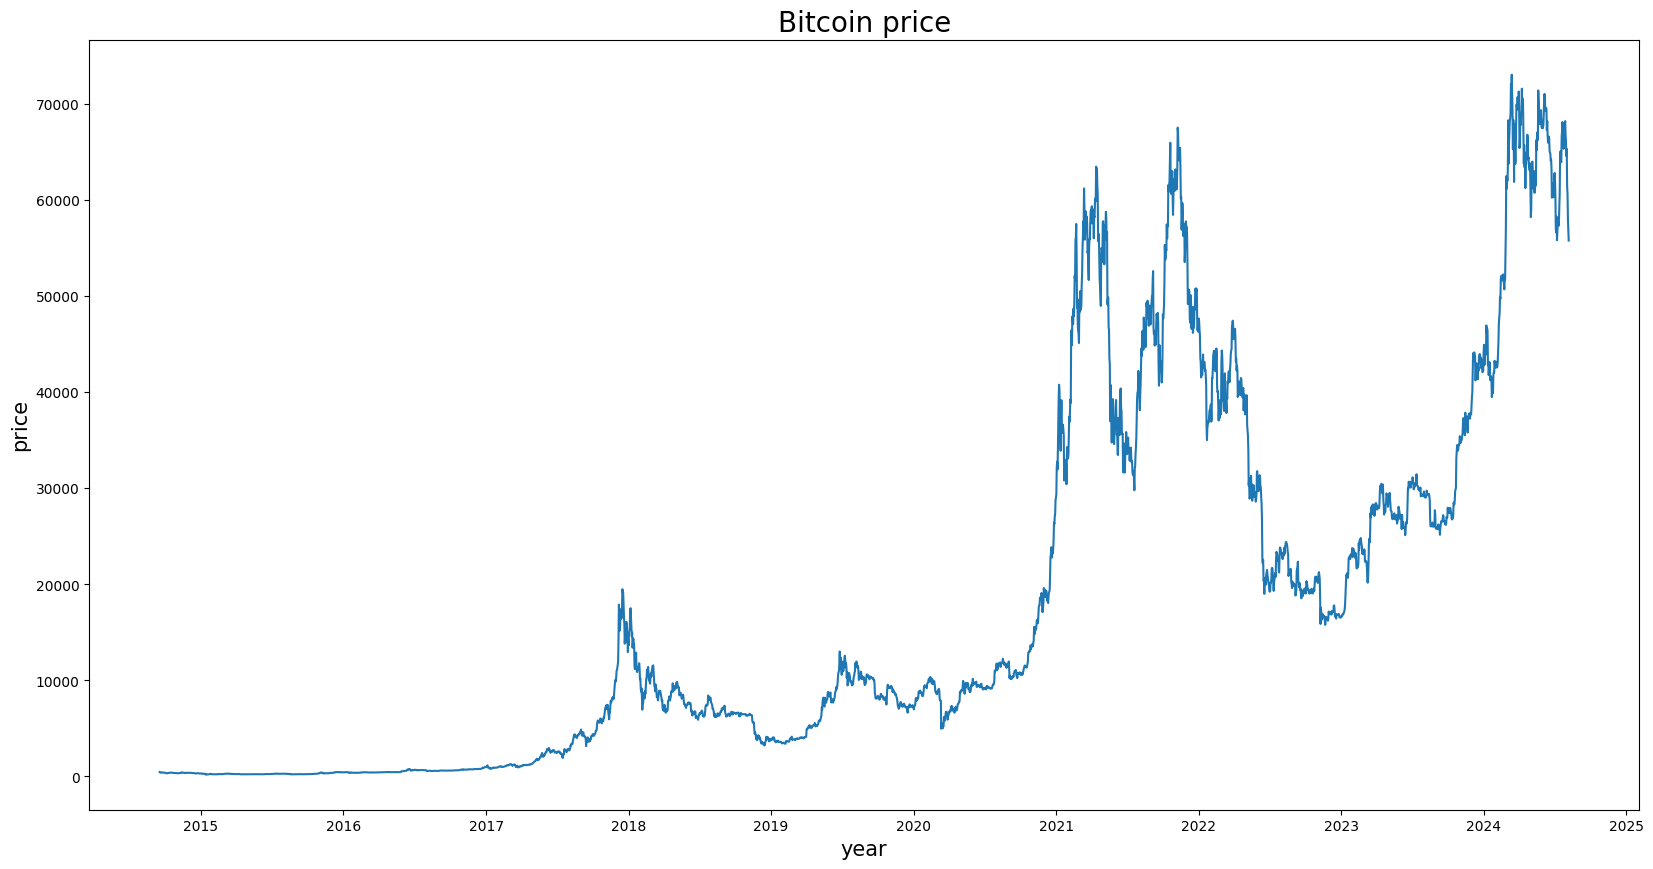

In [6]:
# Show the bitcoin graph
plt.figure(figsize=(20,10))
plt.plot(df)
plt.title('Bitcoin price',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()



In [7]:
# Scale the data
scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
df['Close'] = price

In [8]:
# Initialize empty lists to store features and labels
X_l = []
y_l = []

N = len(df)
D = 50
# Iterate over the dataframe to create feature-label pairs
for i in range(N-D-1):
    X_l.append(df.iloc[i:i+D])
    y_l.append(df.iloc[i+D])

# Convert the lists to numpy arrays
X = np.array(X_l)
y = np.array(y_l)

print(X.shape, y.shape)

(3560, 50, 1) (3560, 1)


In [9]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

In [10]:
# Make the model
m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.LSTM(10)(m_x)
m_y = layers.Dense(1)(m_h)
m = models.Model(m_x,m_y)
m.compile('adam','mse')
m.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model using the training data (X_train and y_train)
history = m.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),verbose=0)

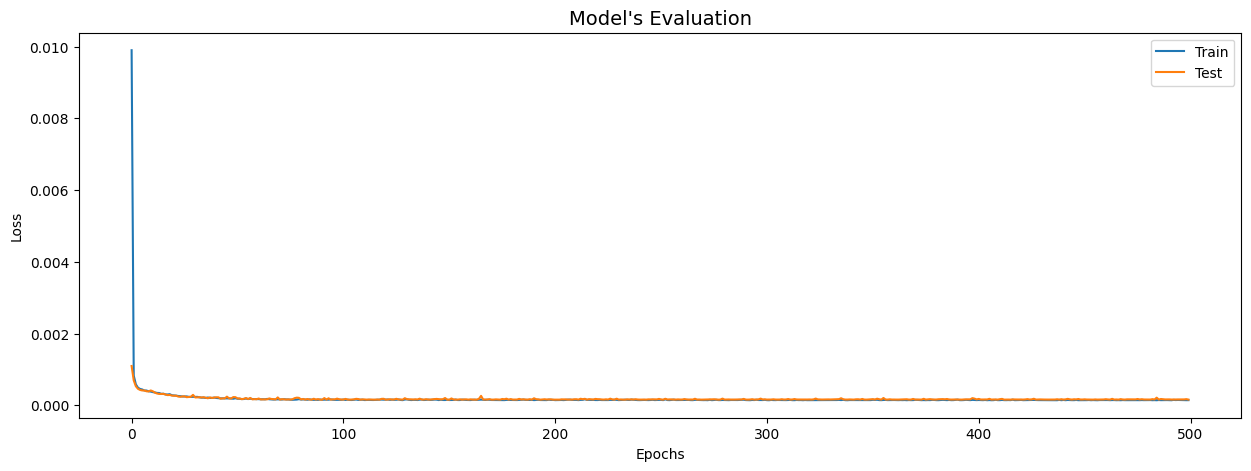

In [94]:

# Create a new figure with a specified size
plt.figure(figsize=(15, 5))

# Plot the training loss history
plt.plot(history.history['loss'])

# Plot the validation loss history
plt.plot(history.history['val_loss'])

# Add a legend to differentiate between training and validation loss
plt.legend(['Train', 'Test'])

# Set the title of the plot
plt.title("Model's Evaluation", fontsize=14)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [92]:
# Print out the final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Loss: 0.0001
Final Validation Loss: 0.0002


In [76]:
# Initialize an empty list to store predictions
pred = []

# Predict the next value using the last 50 values from the dataframe
pr = m.predict(np.array(df[-50:]))
pred.append(pr[0])

# Iteratively predict the next 49 values using a sliding window approach
for i in range(1, 50):
    # Concatenate the most recent 50 values with the previously predicted values
    pr = m.predict(np.concatenate((np.array(df[-50+i:]), pred[:]), axis=0))
    # Append the new prediction to the list
    pred.append(pr[0])

# Predict 250 more values, extending the predictions iteratively
for i in range(0, 250):
    # Concatenate the predictions from the current list and reshape
    pr = m.predict(np.concatenate(pred[i:], axis=0).reshape(-1, 1))
    # Append the new prediction to the list
    pred.append(pr[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━

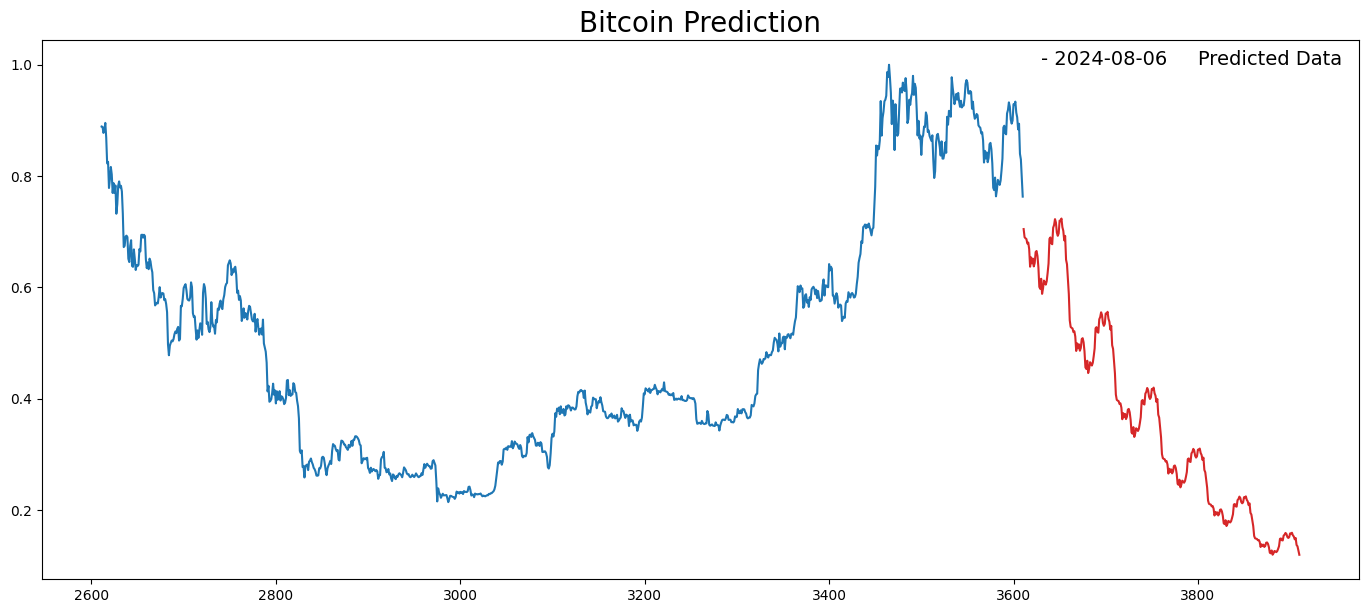

In [88]:
# Convert 'pred' into a DataFrame and reset the index
pred = pd.DataFrame(pred)
pred = pred.reset_index()

# Rename columns for clarity
pred.columns = ['z', 'price']

# Drop the 'z' column as it's no longer needed
pred.drop(['z'], axis=1, inplace=True)

# Concatenate the original data (after resetting the index and dropping 'Date') with the predictions
data = pd.concat([df.reset_index().drop('Date', axis=1), pred], ignore_index=True)

# Plotting the data
plt.figure(figsize=(17, 7))
# Plot the last 1300 to 300 entries of the data
plt.plot(data[-1300:-300])
plt.title("Bitcoin Prediction", fontsize=20)
# Add annotation for the predicted data
plt.text(3800, 1, "Predicted Data", fontsize=14)
plt.text(3630, 1, "- 2024-08-06", fontsize=14)
# Plot the last 300 entries of the data
plt.plot(data[-300:])
plt.show()